# Welcome to the HighTEA tutorial!

This notebook is an introdcution in some functionality of the HighTEA (High energy - Theory Event Analysis) database.

This is still in an early phase of development. Please report any bug or problem to hightea@hep.phy.cam.ac.uk or create an issue on https://github.com/HighteaCollaboration/hightea-examples/issues.

The next 2 line needs to be executed to install the highteacli hightea-plotting library. (If you run this notebook locally and you have already install them you can skip this step)

In [ ]:
%pip install hightea-client > /dev/null
%pip install hightea-plotting > /dev/null

The next line will load the user interface which makes interaction with database really easy!

In [1]:
# execute this line to load the hightea library
from hightea.client import Interface as hightea
from hightea.plotting import plot

If you would like to store results and job information on your GoogleDrive (see FAQ in Start.ipynb) change the directory here:

In [2]:
USERDIR='.'
#from google.colab import drive
#drive.mount('/content/drive')
#USERDIR='/content/drive/MyDrive/hightea/'

# 1. *A first simple histogram*

The first thing to do is to create a job. A job contains all the information needed to create request to the database. After building a job, the first thing we need to do is to specify the process we want to perform an analysis for. A list of available processes can be generated by `job1.list_processes()`. Here, as an example, we use the top-quark pair production process at the 13 TeV LHC.

In [3]:
job1 = hightea('Tutorial-job1',directory=USERDIR)
job1.process('pp_tt_13000_172.5')

   pp -> tt~ + X at 13 TeV mt = 172.5 GeV 

Process tag         :  pp_tt_13000_172.5  (use for process specification)
Momenta layout      :  ['t', 'tbar']
Default scales      :  muR0 = HT/4, muF0 = HT/4
Default pdf         :  NNPDF31_nnlo_as_0118 / 0
Avail. contributions:  ['NNLO', 'NLO', 'LO']
Predefined variables
   pt_t        :  sqrt(p_t_1**2 + p_t_2**2)
   pt_tbar     :  sqrt(p_tbar_1**2 + p_tbar_2**2)
   y_t         :  0.5*log((p_t_0 + p_t_3)/(p_t_0 - p_t_3))
   y_tbar      :  0.5*log((p_tbar_0 + p_tbar_3)/(p_tbar_0 - p_tbar_3))
   m_tt        :  sqrt((p_t_0+p_tbar_0)**2-(p_t_1+p_tbar_1)**2-(p_t_2+p_tbar_2)**2-(p_t_3+p_tbar_3)**2)
   mt_t        :  sqrt(172.5*172.5+pt_t*pt_t)
   mt_tbar     :  sqrt(172.5*172.5+pt_tbar*pt_tbar)
   HTo4        :  (mt_t+mt_tbar)/4.


A basic histogram specification needs

1. `job1.contribution(string)`: include a contribution. Each process provides a list of contributions througt the metadata, see above.

2. `job1.observable(string,list)`: specify the actual histogram through a variable `string` and a list of bin edges (`[...]`). We used in the example a predefiend variable `pt_top`. All predefiend variables are listed above. Customized observables are discussed in a later example.

In [4]:
job1.contribution('LO') # define LO as contribution
job1.observable('pt_t',[0, 50, 100, 150, 200, 250, 300, 350, 400]) # define a binning

Having defined a request, it is time to send off to the database and wait for the result. This is done by the `job1.request()` function which send off a request and will patiently wait until the request has been processed. In case of success it will retrieve automatically the results and store it.

In [5]:
job1.request()

request submitted :  2022-11-25 15:04:49.532304
request finished  :  2022-11-25 15:04:50.620445


The `request()` command will print out when a request has been submitted and when it has been finished.

So, we can investigate the result via `job1.show_result()` . There is also the function `job.result()` which provides a more machine readable format.

We also demonstrate the basic usage of the provided plotting routines.

Name                    :  Tutorial-job1
Contributions           :  ['LO']
fiducial xsection       :       576.06
fiducial xsection error :       1.3574
Histogram     : pt_t
 bin1 low  | bin1 high | sigma [pb]  | mc-err [pb] |
         0 |        50 |      89.333 |     0.63489 |
        50 |       100 |      181.66 |     0.81001 |
       100 |       150 |      148.11 |     0.59116 |
       150 |       200 |      82.029 |     0.33484 |
       200 |       250 |      39.354 |     0.17451 |
       250 |       300 |      18.044 |    0.089701 |
       300 |       350 |       8.573 |     0.04804 |
       350 |       400 |      4.1424 |    0.026463 |




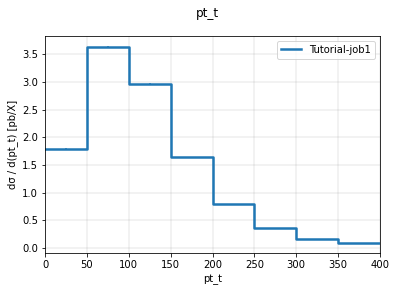

In [6]:
job1.show_result() # create a human-readable histogram
plot(job1.result()); # make a plot

Very good! You just computed your first differential cross section with HighTEA!

# 2. *A first NNLO analysis*

Lets do a little bit more complicated example. An usual application would be to study a observable at different orders in perturbation theory. We can easily do this by running jobs using different contributions.

In [7]:
job2_LO = hightea('Tutorial-job2-LO',directory=USERDIR)
job2_LO.process('pp_tt_13000_172.5',verbose=False) # verbose=False to avoid printing process information
job2_LO.contribution('LO')
job2_LO.observable('pt_t',[0, 50, 100, 150, 200, 250, 300, 350, 400])

job2_NLO = hightea('Tutorial-job2-NLO',directory=USERDIR)
job2_NLO.process('pp_tt_13000_172.5',verbose=False) # verbose=False to avoid printing process information
job2_NLO.contribution('NLO')
job2_NLO.observable('pt_t',[0, 50, 100, 150, 200, 250, 300, 350, 400])

job2_NNLO = hightea('Tutorial-job2-NNLO',directory=USERDIR)
job2_NNLO.process('pp_tt_13000_172.5',verbose=False) # verbose=False to avoid printing process information
job2_NNLO.contribution('NNLO')
job2_NNLO.observable('pt_t',[0, 50, 100, 150, 200, 250, 300, 350, 400])

In [8]:
job2_LO.request()
job2_NLO.request()
job2_NNLO.request()

request submitted :  2022-11-25 15:05:01.463729
request finished  :  2022-11-25 15:05:02.549571
request submitted :  2022-11-25 15:05:02.582814
request finished  :  2022-11-25 15:05:06.728719
request submitted :  2022-11-25 15:05:06.780593
request finished  :  2022-11-25 15:06:22.285495


Again you investigate the results via `job2.show_result()`. But it is much nicer to produce a plot to compare the different orders! The simplest way is to use the provided plotting routines.

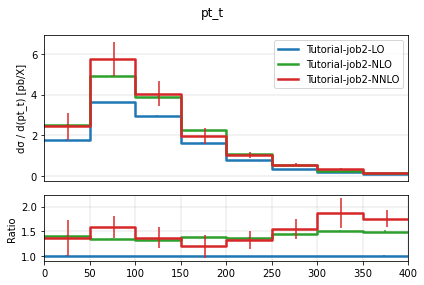

In [9]:
plot(job2_LO.result(),job2_NLO.result(),job2_NNLO.result(),ratio=0);

**Congratulations!** You just performed a fully-fledged NNLO QCD computation for top-quark pair production! Easy, wasn't it?
You should have produced a figure which looks like:

![alt text](./figs/tutorial-fig1.png "Example")

# 3. *Scale and PDF variations using reweighting*

Let's move on to analysis of perturbative theory uncertainties estimated by scale and PDF variations.

**Scale variations:**
See the request below, we introduce the function `job.scales('muR','muF')`. `'muR'` and `'muF'` control the renormalization and factorization scale respectively. The example is somewhat redundent as we choose the scale HT/4, which is the default scale, a typical scale for top-quark pair production. To check what the default scale of a process is refer to the meta data.
 
**PDF variation:** We also introduce the `job.pdf('pdf')` function keyword which allows to choose a PDF. To list the currently available PDF sets refer to `job.list_pdfs()`.

**Custom observables:** And finally we introduce the function `job.define_new_variable('name','definition')` which allows to define custom variables. Here we define the invariant mass of the top-quark pair as a new observable. A new observable needs to be specified only once per job.
 
Changing the central scales and PDFs is nice but usually one is interested in some theory uncertainty determined from scale variations. There are two predefined scale variations available:

1. `'3-point'` : Variation of scale by a factor of 2 and 1/2. muR and muF are varied simulanously
2. `'7-point'` : Variation of scales by a factor 2 and 1/2, independently for muR and muF with the constraint 1/2 < muR/muF < 2

They can be easly requested by the `job.scale_variation` function.

Again let us compute this histogram at the different orders in perturbation theory. Additionally to requesting different orders we also request a standard '3-point' variation.

The runtime of this is about 8 minutes. The reweighting takes a little bit longer as requests without specifing `'muR'`,`'muF'` or `'pdf'` since calls to LHAPDF are necessary.

In [10]:
job3 = {}
for order in ['LO','NLO','NNLO']:
    job3[order] = hightea('Tutorial-job3-'+order,directory=USERDIR)
    job3[order].process('pp_tt_13000_172.5',verbose=False)
    job3[order].define_new_variable('mtt','sqrt((p_t_0+p_tbar_0)**2-(p_t_1+p_tbar_1)**2-(p_t_2+p_tbar_2)**2-(p_t_3+p_tbar_3)**2)')
    job3[order].contribution(order)
    job3[order].scales('HTo4','HTo4')
    job3[order].pdf('CT14nnlo')
    job3[order].observable('mtt',[345, 400, 450, 500, 550, 600, 650, 700])
    job3[order].scale_variation('3-point')
    job3[order].request()

request submitted :  2022-11-25 15:06:24.552192
request finished  :  2022-11-25 15:06:28.857360
request submitted :  2022-11-25 15:06:30.380062
request finished  :  2022-11-25 15:07:04.093111
request submitted :  2022-11-25 15:07:05.909333
request finished  :  2022-11-25 15:10:49.633111


In [11]:
job3['LO'].show_result()
job3['NLO'].show_result()
job3['NNLO'].show_result()

Name                    :  Tutorial-job3-LO
Contributions           :  ['LO']
muR                     :  HTo4
muF                     :  HTo4
pdf                     :  CT14nnlo , 0
fiducial xsection       :       582.32
fiducial xsection error :       1.3641
systematic unc. [%]     : scale (3)
                        :  +       31/ -       22
Histogram     : mtt
 bin1 low  | bin1 high | sigma [pb]  | mc-err [pb] |         scale (3) [%] |
       345 |       400 |      119.24 |     0.82327 | +       27/ -       20|
       400 |       450 |      121.39 |       0.658 | +       29/ -       21|
       450 |       500 |      94.387 |      0.4673 | +       30/ -       22|
       500 |       550 |      67.949 |     0.32572 | +       31/ -       22|
       550 |       600 |      48.474 |     0.22971 | +       32/ -       23|
       600 |       650 |      34.296 |     0.16371 | +       33/ -       23|
       650 |       700 |      24.416 |     0.11843 | +       34/ -       24|


Name            

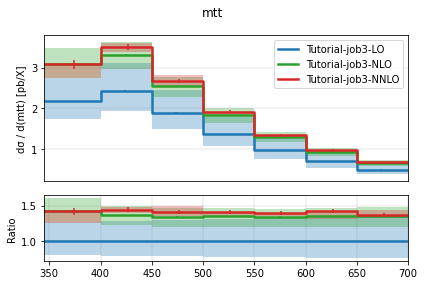

In [12]:
plot(job3['LO'].result(),job3['NLO'].result(),job3['NNLO'].result(),ratio=0);

# 4. *Introducing phase space cuts*

Using the `job.cuts()` function allows to define phase space cuts. In the example below we introduce a cut on the top-quark transverse momentum.

In [13]:
job4 = {}
for ptcuts in ['10','20','30']:
    job4[ptcuts] = hightea('Tutorial-job4-ptcut'+ptcuts,directory=USERDIR)
    job4[ptcuts].process('pp_tt_13000_172.5',verbose=False)
    job4[ptcuts].define_new_variable('mtt','sqrt((p_t_0+p_tbar_0)**2-(p_t_1+p_tbar_1)**2-(p_t_2+p_tbar_2)**2-(p_t_3+p_tbar_3)**2)')
    job4[ptcuts].contribution('NNLO')
    job4[ptcuts].observable('mtt',[345, 400, 450, 500, 550, 600, 650, 700])
    job4[ptcuts].cuts('pt_t > '+ptcuts)
    job4[ptcuts].request()

request submitted :  2022-11-25 15:10:51.747158
request finished  :  2022-11-25 15:11:25.118444
request submitted :  2022-11-25 15:11:26.688307
request finished  :  2022-11-25 15:12:00.069677
request submitted :  2022-11-25 15:12:01.812571
request finished  :  2022-11-25 15:12:35.190175


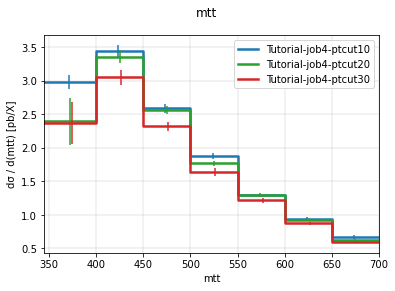

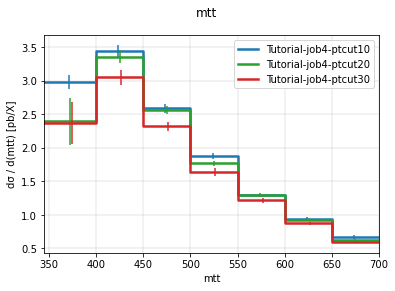

In [14]:
plot(job4['10'].result(),job4['20'].result(),job4['30'].result())

Additionally to the differential cross section the fiducial cross section (i.e. the cross section with cuts applied) is computed as well. See below how the value changes with increasing transverse momentum cut.

In [15]:
job4['10'].show_result()
job4['20'].show_result()
job4['30'].show_result()

Name                    :  Tutorial-job4-ptcut10
Contributions           :  ['NNLO']
fiducial xsection       :       804.06
fiducial xsection error :       9.6271
Histogram     : mtt
 bin1 low  | bin1 high | sigma [pb]  | mc-err [pb] |
       345 |       400 |      163.96 |      6.1351 |
       400 |       450 |      172.22 |      4.2299 |
       450 |       500 |      129.38 |      3.6412 |
       500 |       550 |      93.958 |      1.9957 |
       550 |       600 |       64.97 |        1.52 |
       600 |       650 |      47.227 |      1.0345 |
       650 |       700 |      33.522 |      1.2399 |


Name                    :  Tutorial-job4-ptcut20
Contributions           :  ['NNLO']
fiducial xsection       :       756.78
fiducial xsection error :       20.673
Histogram     : mtt
 bin1 low  | bin1 high | sigma [pb]  | mc-err [pb] |
       345 |       400 |      131.97 |      19.254 |
       400 |       450 |      168.06 |      4.9318 |
       450 |       500 |      128.19 |      3.140

# 5. PDF uncertainties

PDF variations for PDF uncertainty estimations can be requested by `job.pdf_variation()`.

The prescription to obtain the PDF error from the variation depends on the PDF set itself. Therefore we only provide PDF uncertainties for list of PDFs which have been implemented. To reduce the computational costs we provide for many available PDFs a reduced version using the SMPDF approach. If such a reduced PDF set is available it will be used automatically in case PDF variations are requested. This default behaviour can be overwritten by `job.pdf_variation('full')` which forces the usage of full PDF set (coming with roughly 10 times the computational costs).

In [16]:
job5 = hightea('Tutorial-job5',directory=USERDIR)
job5.process('pp_tt_13000_172.5',verbose=False)
job5.define_new_variable('mtt','sqrt((p_t_0+p_tbar_0)**2-(p_t_1+p_tbar_1)**2-(p_t_2+p_tbar_2)**2-(p_t_3+p_tbar_3)**2)')

In [17]:
job5.contribution('NLO')
job5.observable('mtt',[345, 400, 450, 500, 550, 600, 650, 700])
job5.pdf('NNPDF31_nnlo_as_0118')
job5.pdf_variation()

In [18]:
job5.request()

request submitted :  2022-11-25 15:12:37.573238
request finished  :  2022-11-25 15:13:33.516881


In [19]:
job5.show_result()

Name                    :  Tutorial-job5
Contributions           :  ['NLO']
pdf                     :  NNPDF31_nnlo_as_0118 , 0
fiducial xsection       :       785.43
fiducial xsection error :        2.176
systematic unc. [%]     : pdf - smpdf (6)
                        :  +      0.9/ -     -0.9
Histogram     : mtt
 bin1 low  | bin1 high | sigma [pb]  | mc-err [pb] |   pdf - smpdf (6) [%] |
       345 |       400 |      169.81 |      1.3247 | +     0.78/ -    -0.78|
       400 |       450 |      164.46 |      1.0506 | +     0.84/ -    -0.84|
       450 |       500 |      125.75 |     0.73845 | +     0.89/ -    -0.89|
       500 |       550 |      90.289 |     0.51046 | +     0.92/ -    -0.92|
       550 |       600 |      63.823 |     0.35652 | +     0.98/ -    -0.98|
       600 |       650 |      45.334 |     0.25242 | +        1/ -       -1|
       650 |       700 |      32.114 |     0.18167 | +      1.1/ -     -1.1|


